# NASDAQ 1962-2024 - Stock Price Analysis

Import necessary libraries:

In [216]:
# Import the necessary libraries

# Importing libraries for data manipulation
import pandas as pd
import numpy as np
import random

# Importing libraries for data visualization
import matplotlib.pylab as plt

# Importing an advanced library for data visualization
import seaborn as sns

# Importing library for date manipulation
from datetime import datetime

# To calculate the MSE or RMSE
from sklearn.metrics import mean_squared_error

# Importing acf and pacf functions
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Importing models from statsmodels and bsts libraries
from statsmodels.tsa.ar_model import AutoReg

from statsmodels.tsa.arima.model import ARIMA

from bsts import BSTS

import ipywidgets as widgets
from ipywidgets import interact
# To ignore the warnings
import warnings
warnings.filterwarnings('ignore')

## Basic Data Analysis and Cleanup

In [217]:
# import data
data = pd.read_csv("C:\\Users\\spase\\Desktop\\Projects\\Data_NASDAQ\\NASDAQ1962-2024.csv")
df = data.copy() # make copy to not change data

# print first five rows
df.head()

,Date,Ticker,Exchange,Open,High,Low,Close,Adj Close,Volume
0,2008-01-29,AACG,NASDAQ,9.50,9.99,8.57,8.75,0.702589,1489000.0
1,2008-01-30,AACG,NASDAQ,8.75,9.15,8.30,8.50,0.682515,219000.0
2,2008-01-31,AACG,NASDAQ,8.49,10.30,8.49,9.55,0.766826,182300.0
3,2008-02-01,AACG,NASDAQ,9.93,9.94,9.50,9.51,0.763614,28200.0
4,2008-02-04,AACG,NASDAQ,9.50,9.71,9.50,9.50,0.762811,8300.0


In [218]:
# data shape
df.shape

(11470963, 9)

In [219]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11470963 entries, 0 to 11470962
Data columns (total 9 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date       object 
 1   Ticker     object 
 2   Exchange   object 
 3   Open       float64
 4   High       float64
 5   Low        float64
 6   Close      float64
 7   Adj Close  float64
 8   Volume     float64
dtypes: float64(6), object(3)
memory usage: 787.6+ MB


Date, Ticker and Exchange are objects, rest are floats.

In [220]:
# Convert Date to datetime data type
df.Date = pd.to_datetime(df.Date,infer_datetime_format=True)

In [221]:
# number of unique values in each column
df.nunique()

Date           15705
Ticker          3370
Exchange           1
Open          458220
High          484375
Low           473964
Close         464241
Adj Close    3362894
Volume        638125
dtype: int64

We can see that we have 3370 different stocks.

In [222]:
# number of null values
df.isnull().sum()

Date           0
Ticker       470
Exchange       0
Open         130
High         130
Low          130
Close        130
Adj Close    130
Volume       130
dtype: int64

We have 470 rows with no Ticker label (unknown stock) and 130 rows with no stock prices.

In [223]:
# define array of stocks that have missing data.
stocks_with_missing_data = df.loc[pd.isnull(df['Low'])].iloc[:,1].unique()

In [224]:
print(stocks_with_missing_data)

['AMNB' 'CRVO' 'ELVN' 'ESGL' 'GAQ' 'JTAI' 'LDWY' 'LUXH' 'NUKK' 'RCAT'
 'RENB' 'SHPW' 'TLSI' 'TYGO' 'VSTE']


We can see that we have 15 stocks that have some missing values.

In [225]:
# find where the missing ticker values are
df.loc[pd.isnull(df['Ticker'])]

,Date,Ticker,Exchange,Open,High,Low,Close,Adj Close,Volume
6898133,2022-07-12,NaN,NASDAQ,7.610,13.390,7.510,12.050,12.050,1486800.0
6898134,2022-07-13,NaN,NASDAQ,9.770,12.000,8.800,8.800,8.800,264400.0
6898135,2022-07-14,NaN,NASDAQ,8.010,8.260,6.321,7.350,7.350,134100.0
6898136,2022-07-15,NaN,NASDAQ,7.640,7.820,6.800,6.800,6.800,47000.0
6898137,2022-07-18,NaN,NASDAQ,6.450,8.490,6.300,6.700,6.700,69400.0
...,...,...,...,...,...,...,...,...,...
6898598,2024-05-16,NaN,NASDAQ,0.590,0.600,0.570,0.590,0.590,134700.0
6898599,2024-05-17,NaN,NASDAQ,0.619,0.663,0.590,0.610,0.610,532000.0
6898600,2024-05-20,NaN,NASDAQ,0.592,0.609,0.575,0.595,0.595,110000.0
6898601,2024-05-21,NaN,NASDAQ,0.621,0.650,0.581,0.584,0.584,335900.0


The values start from 12 July 2022, perhaps the previous and later values can make it clear which stock this is supposed to be.

In [226]:
# find the stock name before the missing values
df.iloc[6898132]

Date         2024-05-22 00:00:00
Ticker                      MYSZ
Exchange                  NASDAQ
Open                        4.53
High                         4.6
Low                          4.1
Close                       4.25
Adj Close                   4.25
Volume                   37800.0
Name: 6898132, dtype: object

In [227]:
# find the stock name before the missing values
df.iloc[6898603]

Date         2017-10-20 00:00:00
Ticker                      NAAS
Exchange                  NASDAQ
Open                       80.25
High                   89.300003
Low                         80.0
Close                  83.050003
Adj Close              83.050003
Volume                 2308940.0
Name: 6898603, dtype: object

We can see on either side we have two different stocks so we can't be sure which stock this is supposed to be. For this project, we will simply drop this unknown stock and drop any stock that has missing values as well.

In [228]:
# drop all null values
df = df.dropna()

In [229]:
df.isnull().sum()

Date         0
Ticker       0
Exchange     0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [230]:
# drop rows with the stocks that have incomplete data
mask = df['Ticker'].isin(stocks_with_missing_data) # boolean mask
df = df[~mask]

In [231]:
# check that we have no null values and that we have removed the incomplete stocks
df.isnull().sum()

Date         0
Ticker       0
Exchange     0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [232]:
df.nunique()

Date           15705
Ticker          3355
Exchange           1
Open          457829
High          483869
Low           473409
Close         463953
Adj Close    3357173
Volume        637908
dtype: int64

We now have 3355 stocks as expected and now null values.

In [233]:
# Collect names of the stocks in an array

stocks = df.iloc[:,1].unique().tolist()

In [234]:
stocks_samp = random.sample(stocks,10)

## Exploratory Data Analysis and Visualization

In [235]:
# Visualizing the stock price in time
def plot_stock_price(ticker):

  figure, ax = plt.subplots(2,2, figsize=(20,10))
  #plt.xlabel("Date")
  #figure.title(f'Prices for {ticker}')

  ax[0,0].plot(df.loc[df['Ticker']==ticker].Date, df.loc[df['Ticker']==ticker].Open,color='tab:blue', marker = '.')
  ax[0, 0].set_title('Open Prices')

  ax[0,1].plot(df.loc[df['Ticker']==ticker].Date, df.loc[df['Ticker']==ticker,"Adj Close"],color = 'tab:purple' ,marker = '.')
  ax[0, 1].set_title('Close Prices')

  ax[1,0].plot(df.loc[df['Ticker']==ticker].Date, df.loc[df['Ticker']==ticker].High,color = 'tab:green', marker = '.')
  ax[1, 0].set_title('High Prices')

  ax[1,1].plot(df.loc[df['Ticker']==ticker].Date, df.loc[df['Ticker']==ticker].Low,color = 'tab:red', marker = '.')
  ax[1, 1].set_title('Low Prices')

  for axs in ax.flat:
        axs.set_xlabel('Date')
        axs.set_ylabel('Price')

  figure.suptitle(f'Prices for {ticker}')
  figure.tight_layout(pad=3.0)


In [236]:
# plot for any stock
interact(plot_stock_price, ticker = stocks_samp)

interactive(children=(Dropdown(description='ticker', options=('ATIF', 'PRCT', 'MYNZ', 'OPRT', 'GDS', 'PRAX', '…

<function __main__.plot_stock_price(ticker)>

In [237]:
# make new columns
df['Delta1'] = df['Close'] - df['Open']
df['Delta2'] = df['High'] - df['Low']

In [238]:
df.head()

,Date,Ticker,Exchange,Open,High,Low,Close,Adj Close,Volume,Delta1,Delta2
0,2008-01-29,AACG,NASDAQ,9.50,9.99,8.57,8.75,0.702589,1489000.0,-0.75,1.42
1,2008-01-30,AACG,NASDAQ,8.75,9.15,8.30,8.50,0.682515,219000.0,-0.25,0.85
2,2008-01-31,AACG,NASDAQ,8.49,10.30,8.49,9.55,0.766826,182300.0,1.06,1.81
3,2008-02-01,AACG,NASDAQ,9.93,9.94,9.50,9.51,0.763614,28200.0,-0.42,0.44
4,2008-02-04,AACG,NASDAQ,9.50,9.71,9.50,9.50,0.762811,8300.0,0.00,0.21


In [239]:
# visualizing the differences
def plot_delta(ticker):

  figure, ax = plt.subplots(1,2, figsize=(20,10))
  #plt.xlabel("Date")
  #figure.title(f'Prices for {ticker}')

  ax[0].plot(df.loc[df['Ticker']==ticker].Date, df.loc[df['Ticker']==ticker].Delta1,color='tab:blue', marker = '.')
  ax[0].set_title('Close-Open')

  ax[1].plot(df.loc[df['Ticker']==ticker].Date, df.loc[df['Ticker']==ticker].Delta2,color = 'tab:purple' ,marker = '.')
  ax[1].set_title('High-Low')

  for axs in ax.flat:
        axs.set_xlabel('Date')
        axs.set_ylabel('Price')

  figure.suptitle(f'Changes for {ticker}')
  figure.tight_layout(pad=3.0)

  plt.show()

In [240]:
# changes for differen stocks
interact(plot_delta, ticker = stocks_samp)

interactive(children=(Dropdown(description='ticker', options=('ATIF', 'PRCT', 'MYNZ', 'OPRT', 'GDS', 'PRAX', '…

<function __main__.plot_delta(ticker)>

In [241]:
df.head()

,Date,Ticker,Exchange,Open,High,Low,Close,Adj Close,Volume,Delta1,Delta2
0,2008-01-29,AACG,NASDAQ,9.50,9.99,8.57,8.75,0.702589,1489000.0,-0.75,1.42
1,2008-01-30,AACG,NASDAQ,8.75,9.15,8.30,8.50,0.682515,219000.0,-0.25,0.85
2,2008-01-31,AACG,NASDAQ,8.49,10.30,8.49,9.55,0.766826,182300.0,1.06,1.81
3,2008-02-01,AACG,NASDAQ,9.93,9.94,9.50,9.51,0.763614,28200.0,-0.42,0.44
4,2008-02-04,AACG,NASDAQ,9.50,9.71,9.50,9.50,0.762811,8300.0,0.00,0.21


## Close price time series

In [242]:
# choose a stock
stock = random.choice(stocks)

In [243]:
# define sub-dataframe
df_stock = df.loc[df["Ticker"]==stock]
df_stock.head()

,Date,Ticker,Exchange,Open,High,Low,Close,Adj Close,Volume,Delta1,Delta2
11229384,1998-04-16,WTFC,NASDAQ,12.166667,12.166667,12.000000,12.000000,9.488255,18450.0,-0.166667,0.166667
11229385,1998-04-17,WTFC,NASDAQ,12.333333,13.000000,12.083333,12.916667,10.213054,94050.0,0.583334,0.916667
11229386,1998-04-20,WTFC,NASDAQ,13.333333,13.333333,13.083333,13.250000,10.476611,10650.0,-0.083333,0.250000
11229387,1998-04-21,WTFC,NASDAQ,13.125000,13.333333,13.000000,13.166667,10.410723,56850.0,0.041667,0.333333
11229388,1998-04-22,WTFC,NASDAQ,13.250000,13.416667,13.083333,13.250000,10.476611,8700.0,0.000000,0.333334


In [244]:
# set date as the index
df_stock = df_stock.set_index("Date")

In [245]:
# keep only the closing price
df_stock = df_stock[["Close"]]

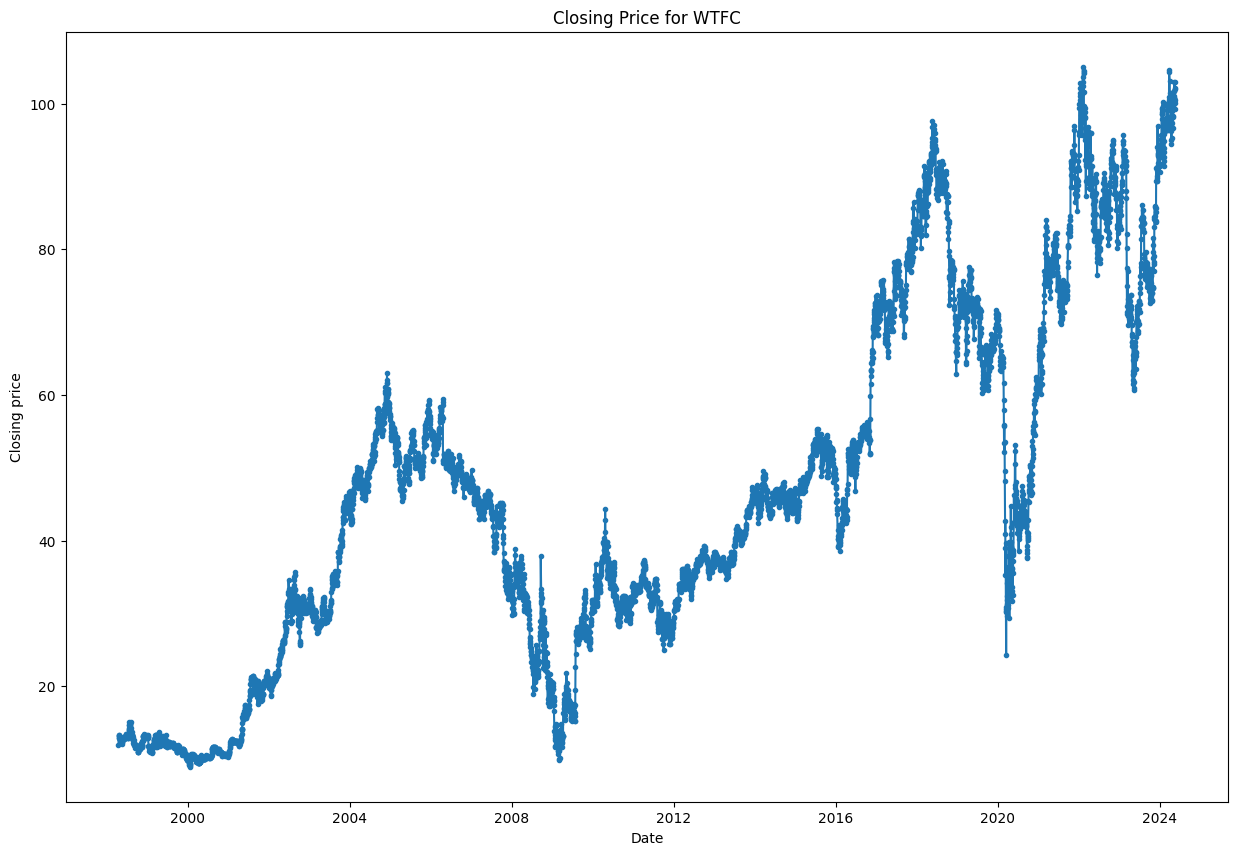

In [246]:
# plot closing price for the stock
plt.figure(figsize=(15,10))

plt.xlabel('Date')
plt.ylabel('Closing price')

plt.title(f'Closing Price for {stock}')
plt.plot(df_stock.index,df_stock.Close,color = 'tab:blue',marker = '.')

### Splitting the data

In [247]:
# split into training and testing data using 70/30 ratio
num_train = df_stock.shape[0]*7//10
df_train , df_test = df_stock.iloc[:num_train] , df_stock.iloc[num_train:]

### Testing stationarity of the data

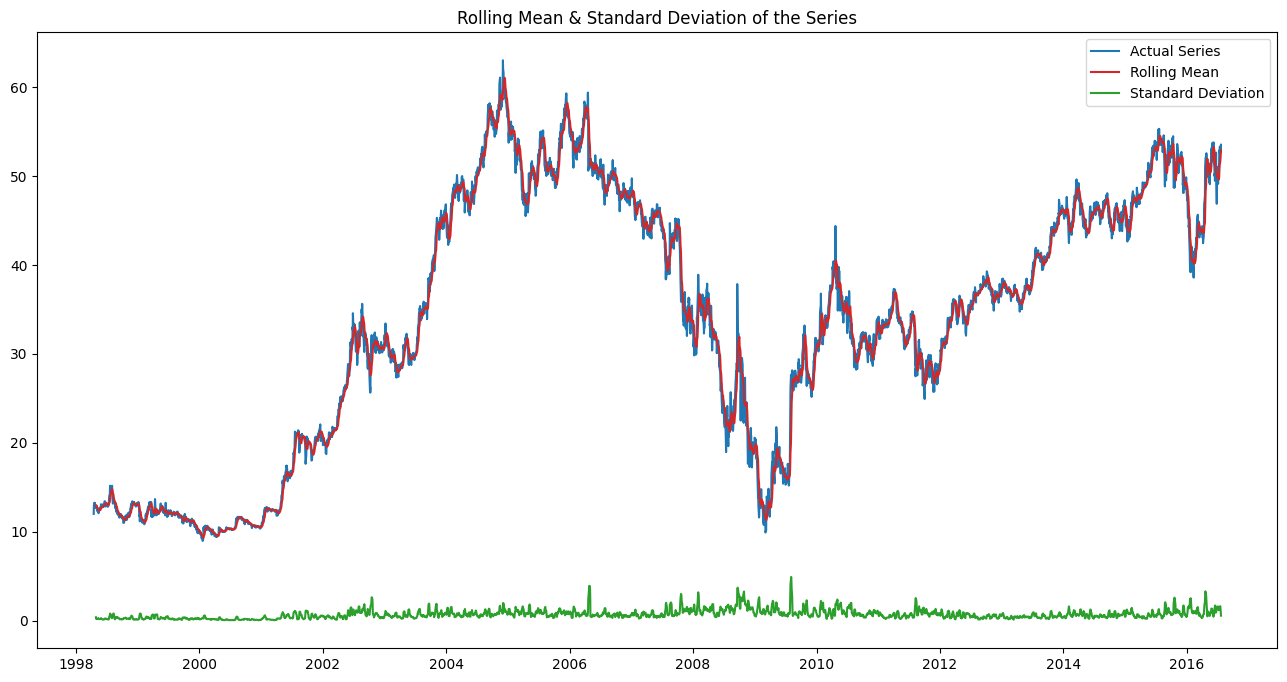

In [248]:
# Calculating the rolling mean and standard deviation for a window of 10 observations
rolmean = df_train.rolling(window = 10).mean()

rolstd = df_train.rolling(window = 10).std()

# Visualizing the rolling mean and standard deviation
plt.figure(figsize = (16, 8))

actual = plt.plot(df_train, color = 'tab:blue', label = 'Actual Series')

rollingmean = plt.plot(rolmean, color = 'tab:red', label = 'Rolling Mean')

plt.plot(rolstd, color='tab:green', label = 'Standard Deviation')

plt.title('Rolling Mean & Standard Deviation of the Series')

plt.legend()

plt.show()

We can also use the **Augmented Dickey-Fuller (ADF) Test** to verify if the series is stationary or not.
The null and alternate hypotheses for the ADF Test are defined as:
- **Null hypothesis:** The Time Series is non-stationary
- **Alternative hypothesis:** The Time Series is stationary

In [249]:
# Define a function to use adfuller test
def adfuller(data):

  #Importing adfuller using statsmodels
    from statsmodels.tsa.stattools import adfuller

    print('Dickey-Fuller Test: ')

    adftest = adfuller(data['Close'])

    adfoutput = pd.Series(adftest[0:4], index = ['Test Statistic', 'p-value', 'Lags Used', 'No. of Observations'])

    for key, value in adftest[4].items():
        adfoutput['Critical Value (%s)'%key] = value

    print(adfoutput)

adfuller(df_train)

Dickey-Fuller Test: 
Test Statistic            -1.501298
p-value                    0.532869
Lags Used                 20.000000
No. of Observations     4577.000000
Critical Value (1%)       -3.431780
Critical Value (5%)       -2.862172
Critical Value (10%)      -2.567106
dtype: float64


The p-value is > 0.05, therfore we fail to reject the null hypothesis and the series is non-stationary.

### Making the series stationary

We can use Log transformation to make the series stationary.

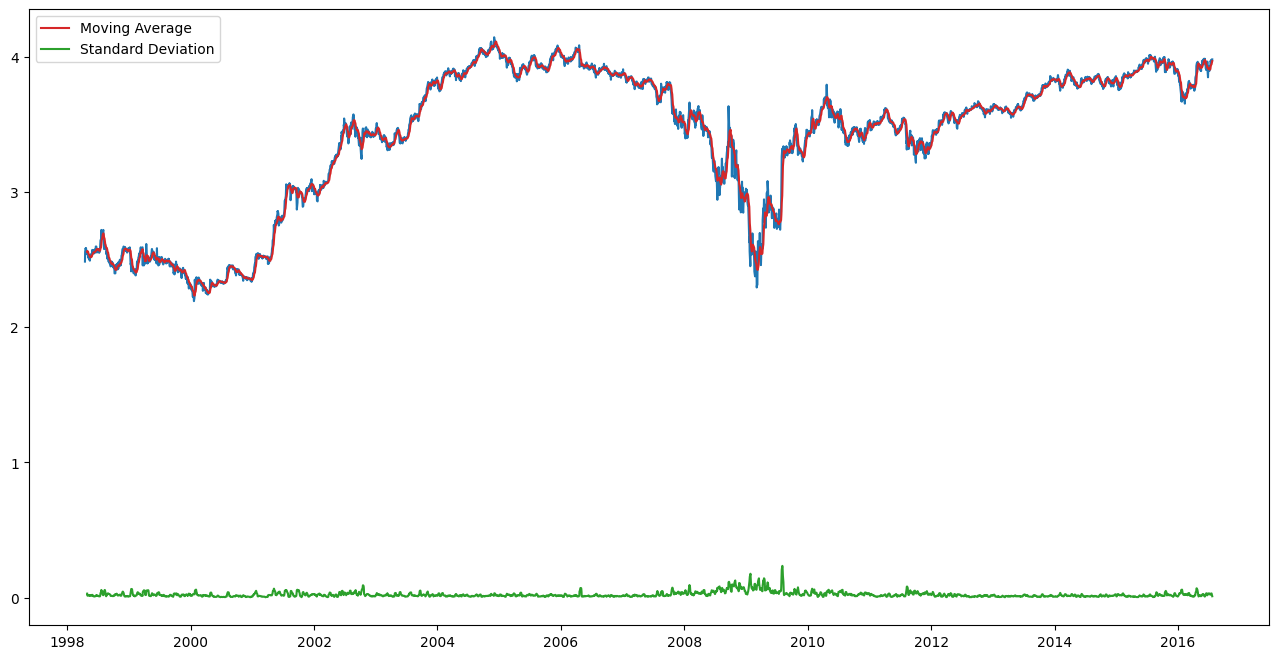

In [250]:
# Visualize the rolling mean and standard deviation after using log transformation
plt.figure(figsize = (16, 8))

df_log = np.log(df_train)

MAvg = df_log.rolling(window = 10).mean()

MStd = df_log.rolling(window = 10).std()

plt.plot(df_log, color='tab:blue')

plt.plot(MAvg, color='tab:red', label = 'Moving Average')

plt.plot(MStd, color='tab:green', label = 'Standard Deviation')

plt.legend()

plt.show()

In [251]:
adfuller(df_log)

Dickey-Fuller Test: 
Test Statistic            -1.667640
p-value                    0.447858
Lags Used                 20.000000
No. of Observations     4577.000000
Critical Value (1%)       -3.431780
Critical Value (5%)       -2.862172
Critical Value (10%)      -2.567106
dtype: float64


The series is still non-stationary, therefore we can apply differencing (using a lagged series).

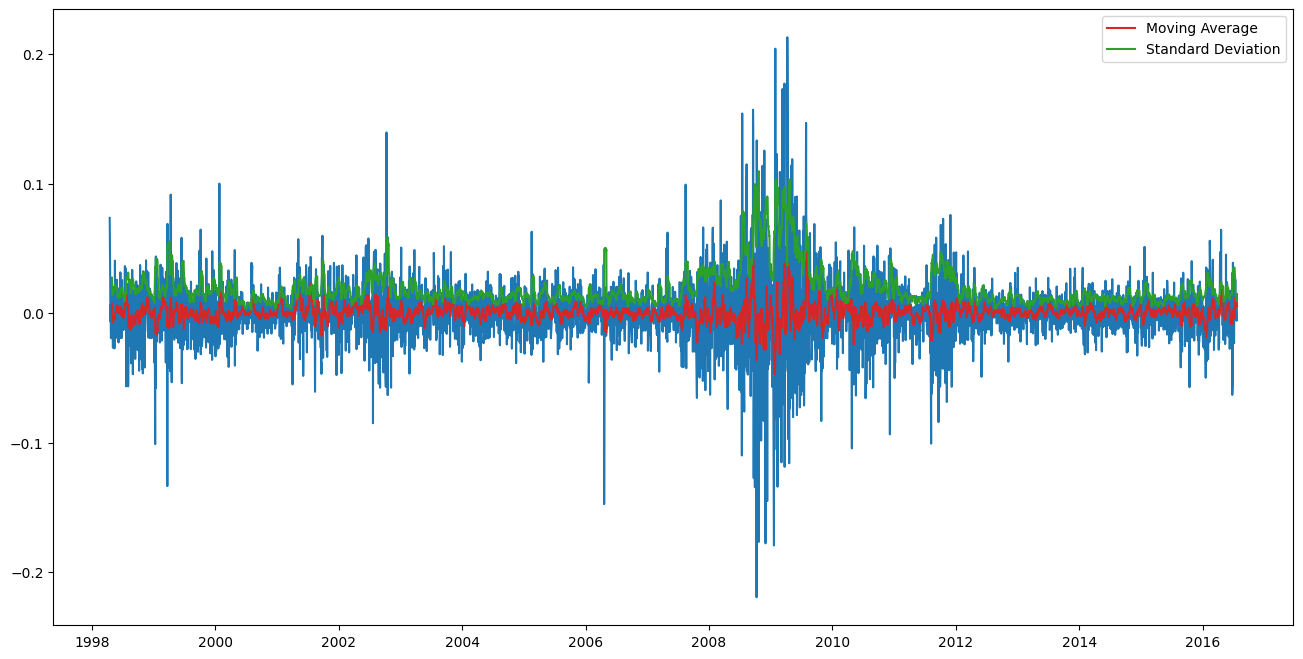

In [252]:
# Fixing the figure size
plt.figure(figsize = (16, 8))

df_diff = df_log.diff().dropna()

MAvg_shift = df_diff.rolling(window = 10).mean()

MStd_shift = df_diff.rolling(window = 10).std()

plt.plot(df_diff, color = 'tab:blue')

plt.plot(MAvg_shift, color = 'tab:red', label = 'Moving Average')

plt.plot(MStd_shift, color = 'tab:green', label = 'Standard Deviation')

plt.legend()

plt.show()

In [253]:
adfuller(df_diff)

Dickey-Fuller Test: 
Test Statistic         -1.475353e+01
p-value                 2.463903e-27
Lags Used               1.900000e+01
No. of Observations     4.577000e+03
Critical Value (1%)    -3.431780e+00
Critical Value (5%)    -2.862172e+00
Critical Value (10%)   -2.567106e+00
dtype: float64


p-value is now much smaller than 0.05 so we can reject the null hypothesis.

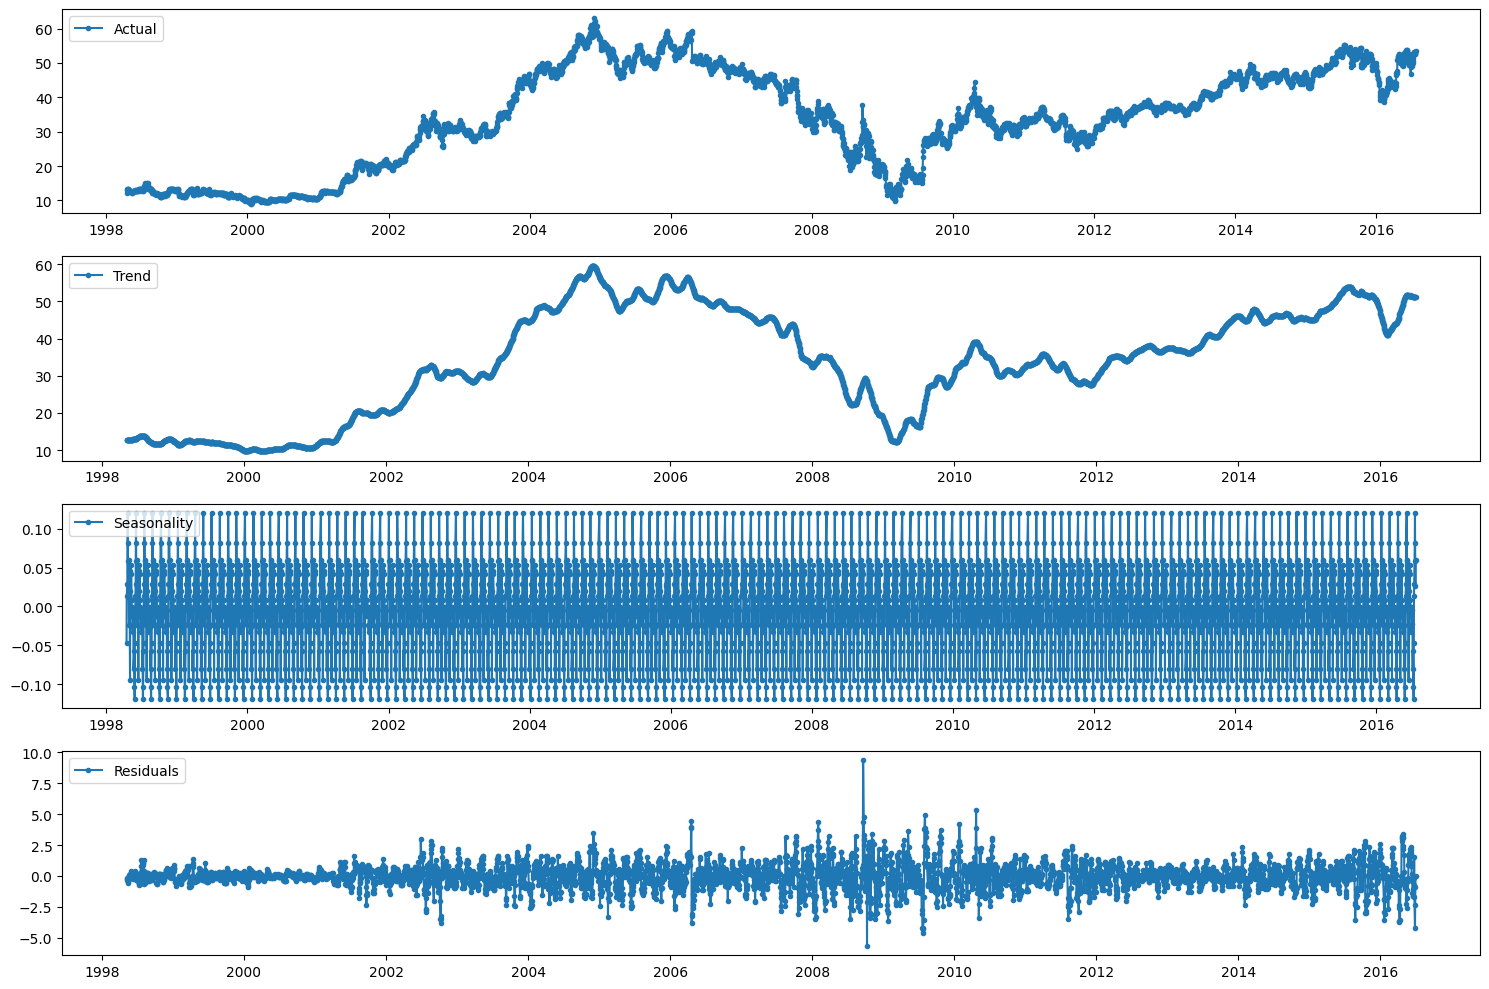

In [254]:
# Importing the seasonal_decompose to decompose the time series
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(df_train,period=30)

trend = decomp.trend

seasonal = decomp.seasonal

residual = decomp.resid

plt.figure(figsize = (15, 10))

plt.subplot(411)

plt.plot(df_train, label = 'Actual', marker = '.')

plt.legend(loc = 'upper left')

plt.subplot(412)

plt.plot(trend, label = 'Trend', marker = '.')

plt.legend(loc = 'upper left')

plt.subplot(413)

plt.plot(seasonal, label = 'Seasonality', marker = '.')

plt.legend(loc = 'upper left')

plt.subplot(414)

plt.plot(residual, label = 'Residuals', marker = '.')

plt.legend(loc = 'upper left')

plt.tight_layout()

### ACF and PACF plots

<Figure size 1600x800 with 0 Axes>

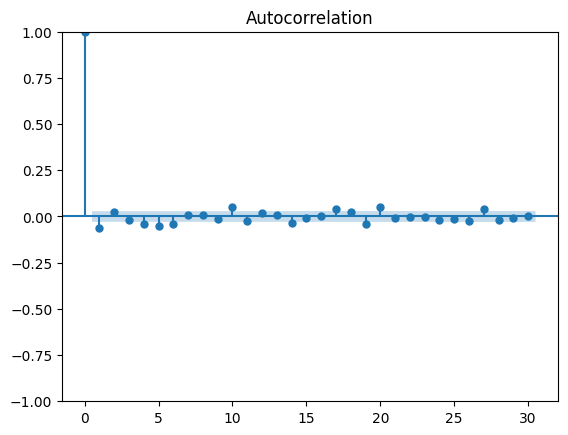

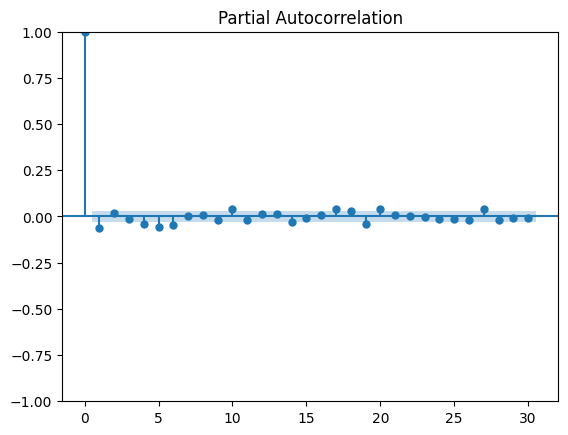

In [255]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize = (16, 8))

plot_acf(df_diff, lags = 30)

plt.show()

plot_pacf(df_diff, lags = 30)

plt.show()

### ARIMA Model

Text(0.5, 1.0, 'ARIMA Model - RMSE: 0.0241')

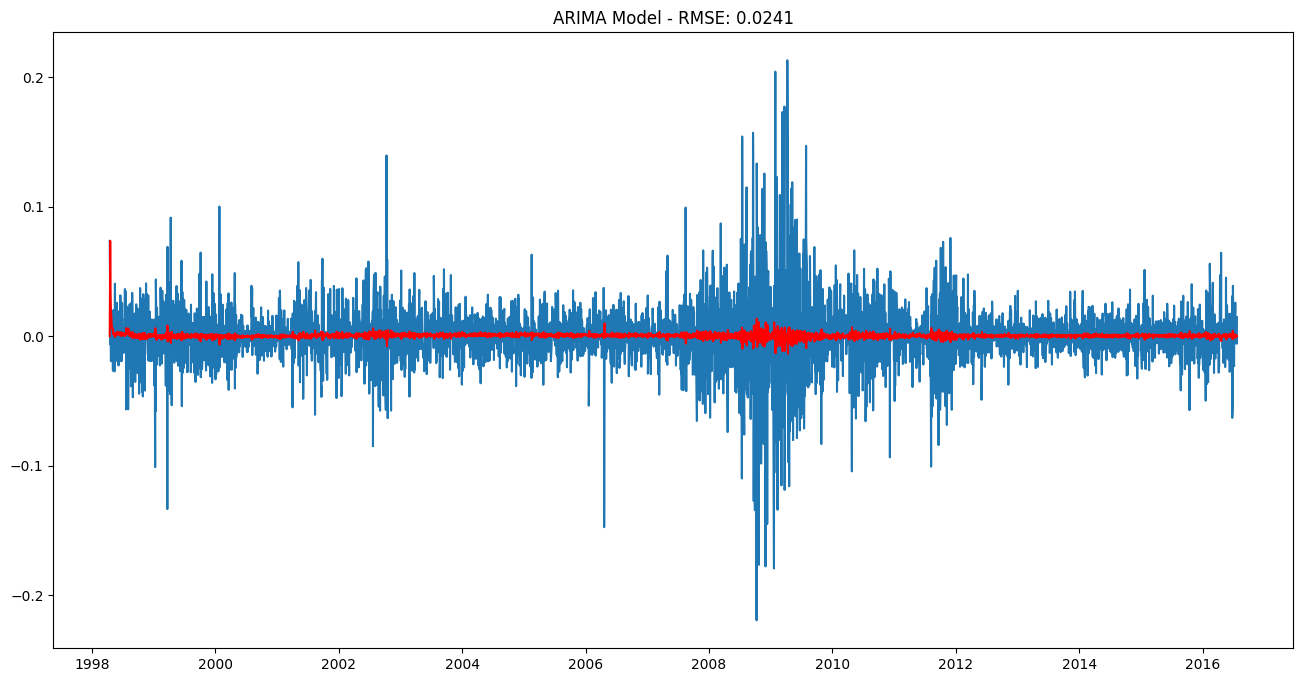

In [256]:
plt.figure(figsize = (16, 8))

q , d , p  = 1 , 1 , 1
model_ARIMA = ARIMA(df_diff, order = (p,d,q))

results_ARIMA = model_ARIMA.fit()

plt.plot(df_diff)

plt.plot(results_ARIMA.fittedvalues, color = 'red')

plt.title('ARIMA Model - RMSE: %.4f'% mean_squared_error(results_ARIMA.fittedvalues, df_diff['Close'], squared = False))


In [257]:
# Calculating the AIC
results_ARIMA.aic

-21203.7101748305

### Predictions

In [258]:
id_train = df_train.index

In [259]:
# Printing the fitted values
predictions = results_ARIMA.fittedvalues

In [260]:
# first value
first_val_log = df_log['Close'][:1]

In [261]:
# Second step - adding the first value of the log series to the cumulative sum values
predictions_log = np.r_[first_val_log, predictions].cumsum()

In [262]:
# Third step - applying exponential transformation
predictions_final = pd.Series(np.exp(predictions_log),index=id_train)

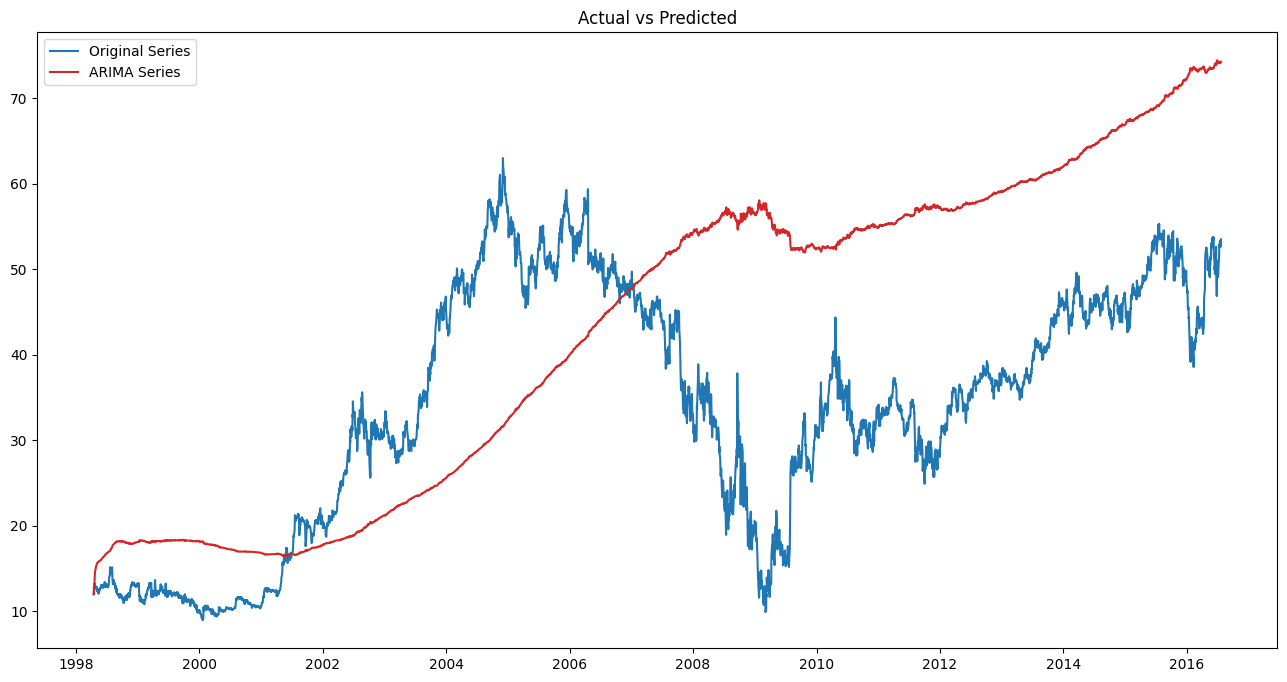

In [263]:
# Plotting the original vs predicted series
plt.figure(figsize = (16, 8))

plt.plot(df_train, color = 'tab:blue', label = 'Original Series')

plt.plot(predictions_final, color = 'tab:red', label = 'ARIMA Series')

plt.title('Actual vs Predicted')

plt.legend()

plt.show()

### Comparing forecast to test data

In [264]:
# number of points to predict
points = df_test.shape[0]

In [265]:
id_test = df_test.index

In [266]:
# Forecasting the values
forecast = results_ARIMA.get_forecast(steps = points)

In [267]:
# get mean and confidence interval
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int(alpha=0.99)
forecast_low_bound = forecast_conf_int.iloc[:,0]
forecast_up_bound = forecast_conf_int.iloc[:,1]

In [268]:
last_log_val = df_log['Close'][-1:]

In [269]:
# Creating a series of cumulative sum
forecast_log = np.r_[last_log_val, forecast_mean].cumsum()
forecast_low_log = np.r_[last_log_val, forecast_low_bound].cumsum()
forecast_up_log = np.r_[last_log_val, forecast_up_bound].cumsum()

In [270]:
# Third step - applying exponential transformation
forecast_final = pd.Series(np.exp(forecast_log),index=last_log_val.index.union(id_test))
forecast_low_final = pd.Series(np.exp(forecast_low_log),index=last_log_val.index.union(id_test))
forecast_up_final = pd.Series(np.exp(forecast_up_log),index=last_log_val.index.union(id_test))

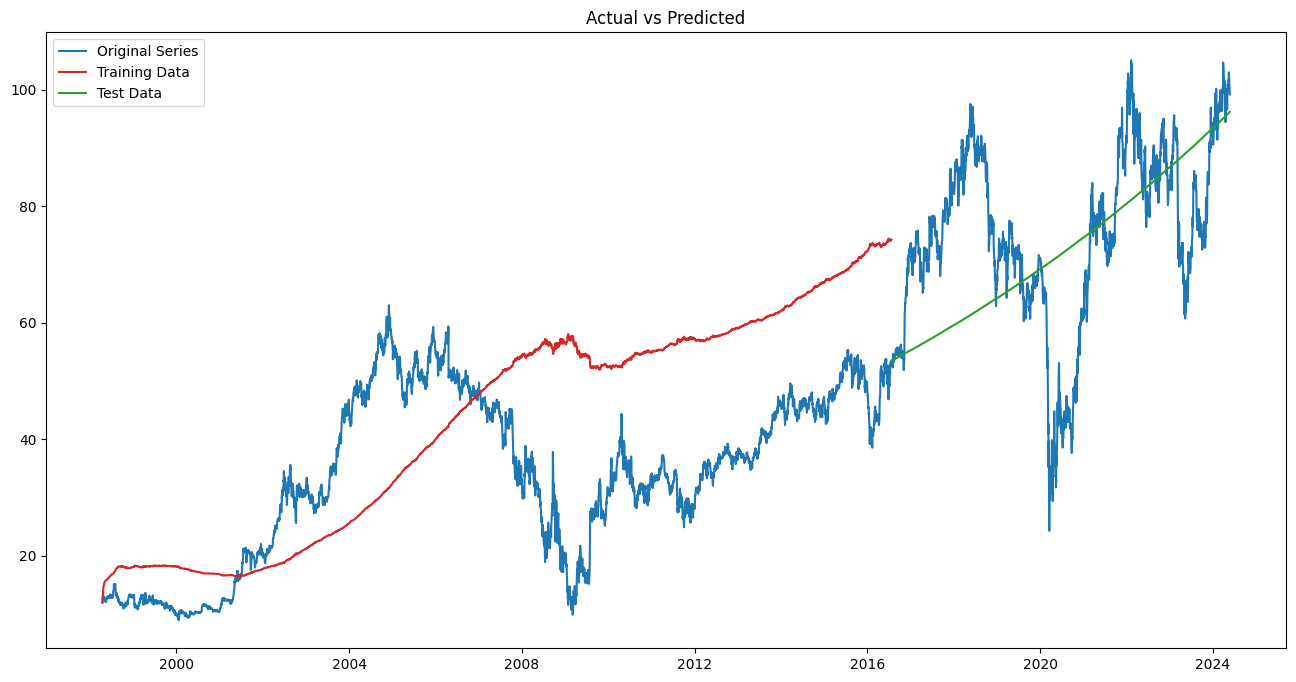

In [271]:
# Plotting the original vs predicted series
plt.figure(figsize = (16, 8))

plt.plot(df_stock, color = 'tab:blue', label = 'Original Series')

plt.plot(predictions_final, color = 'tab:red', label = 'Training Data')

plt.plot(forecast_final, label = 'Test Data', color = 'tab:green')
#plt.fill_between(last_log_val.index.union(id_test),forecast_low_final.iloc[:],forecast_up_final.iloc[:], color='pink', alpha=0.3)
#plt.plot(forecast_low_final, label = 'ARMA Forecast', color = 'tab:green')
#plt.plot(forecast_up_final, label = 'ARMA Forecast', color = 'tab:cyan')
plt.title('Actual vs Predicted')

plt.legend()

plt.show()

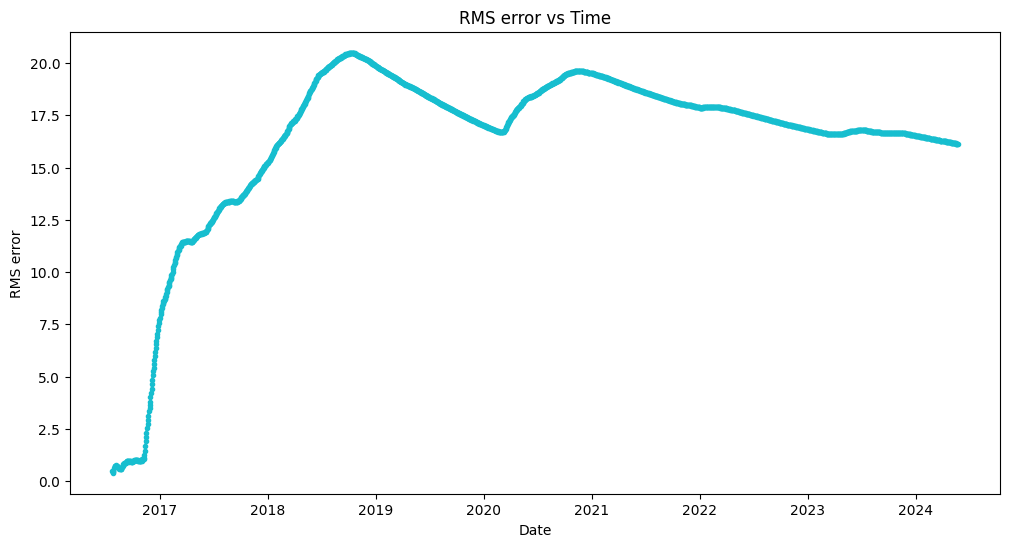

In [272]:
# plot the error function of time
vals = range(1,df_test.shape[0]+1)
rms_vals = []
for i in vals:
    rms_vals.append(mean_squared_error(forecast_final[1:1+i], df_test['Close'][:i], squared = False))

rms_t = pd.Series(rms_vals,index=df_test.index)

plt.figure(figsize=(12,6))
plt.title('RMS error vs Time')
plt.xlabel('Date')
plt.ylabel('RMS error')
plt.plot(rms_t,marker='.',color='tab:cyan')
plt.show()

## Long Short-Term Memory Networks

In [273]:
# import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [274]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(df_train.values)
test_scaled = scaler.transform(df_test.values)

In [275]:
# Function to create dataset
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

In [276]:
# create datasets for training and testing
look_back = 3
X_train, y_train = create_dataset(train_scaled, look_back)
X_test, y_test = create_dataset(test_scaled, look_back)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], look_back, 1)
X_test = X_test.reshape(X_test.shape[0], look_back, 1)

In [277]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

Epoch 1/100
4595/4595 - 6s - 1ms/step - loss: 0.0011
Epoch 2/100
4595/4595 - 4s - 900us/step - loss: 3.6913e-04
Epoch 3/100
4595/4595 - 4s - 922us/step - loss: 3.0578e-04
Epoch 4/100
4595/4595 - 4s - 900us/step - loss: 2.6679e-04
Epoch 5/100
4595/4595 - 4s - 915us/step - loss: 2.4913e-04
Epoch 6/100
4595/4595 - 4s - 900us/step - loss: 2.3943e-04
Epoch 7/100
4595/4595 - 4s - 916us/step - loss: 2.3073e-04
Epoch 8/100
4595/4595 - 4s - 909us/step - loss: 2.2318e-04
Epoch 9/100
4595/4595 - 4s - 905us/step - loss: 2.2547e-04
Epoch 10/100
4595/4595 - 4s - 930us/step - loss: 2.2597e-04
Epoch 11/100
4595/4595 - 4s - 972us/step - loss: 2.2026e-04
Epoch 12/100
4595/4595 - 4s - 956us/step - loss: 2.1210e-04
Epoch 13/100
4595/4595 - 4s - 919us/step - loss: 2.1140e-04
Epoch 14/100
4595/4595 - 4s - 901us/step - loss: 2.1276e-04
Epoch 15/100
4595/4595 - 4s - 921us/step - loss: 2.0825e-04
Epoch 16/100
4595/4595 - 4s - 917us/step - loss: 2.0792e-04
Epoch 17/100
4595/4595 - 4s - 906us/step - loss: 2.0686

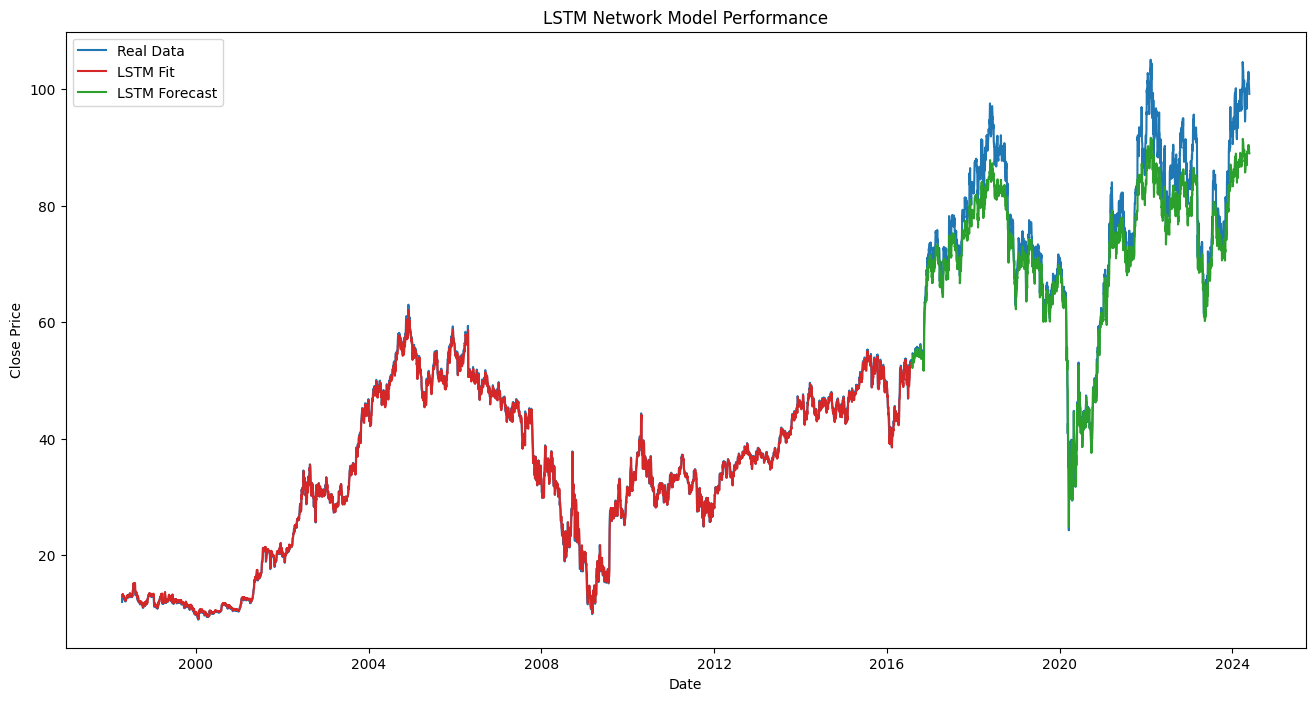

In [278]:
# Plotting the results
plt.figure(figsize=(16, 8))
plt.title('LSTM Network Model Performance')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(df_stock.index, df_stock.values, label='Real Data',color='tab:blue')
plt.plot(df_train.index[look_back:], train_predict, label='LSTM Fit',color='tab:red')
plt.plot(df_test.index[look_back:], test_predict, label='LSTM Forecast',color='tab:green')
plt.legend()
plt.show()

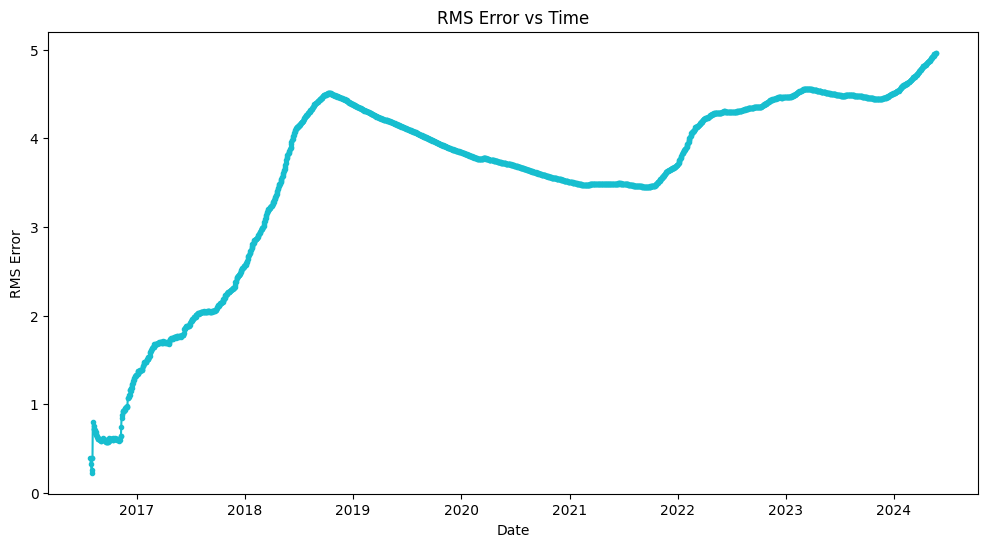

In [279]:
# plot RMS error
test_values = df_test.values[look_back:]  # Adjust for look_back

rms_vals = []
for i in range(1, test_values.shape[0] + 1):
    rms_vals.append(mean_squared_error(test_values[:i], test_predict[:i], squared=False))

rms_t = pd.Series(rms_vals, index=df_test.index[look_back:])

plt.figure(figsize=(12, 6))
plt.title('RMS Error vs Time')
plt.xlabel('Date')
plt.ylabel('RMS Error')
plt.plot(rms_t, marker='.', color='tab:cyan')
plt.show()